# CONTOURS

**```contours, hierarchy =   cv2.findContours(image, mode, method, contours, hierarchy, offset)```**
##
**```cv2.drawContours(image, contours, contourIdx, color, thickness, lineType, hierarchy, maxLevel, offset)```**
##

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Pre-processing Images for the Contour Detection
##
##
#### 1] Thresholding based - useful for simple images with fewer colors
#### 2] Edge based - useful for complex images with more colors


#
#
#
#
#

## 1] Thresholding based method

In [14]:
image = cv2.imread('saved/tree.jpg') # This img has limited and same colors so it will yield good result
# image = cv2.imread('saved/virat1.jpg') # This img has more colors so it will yield avg result

(-0.5, 238.5, 210.5, -0.5)

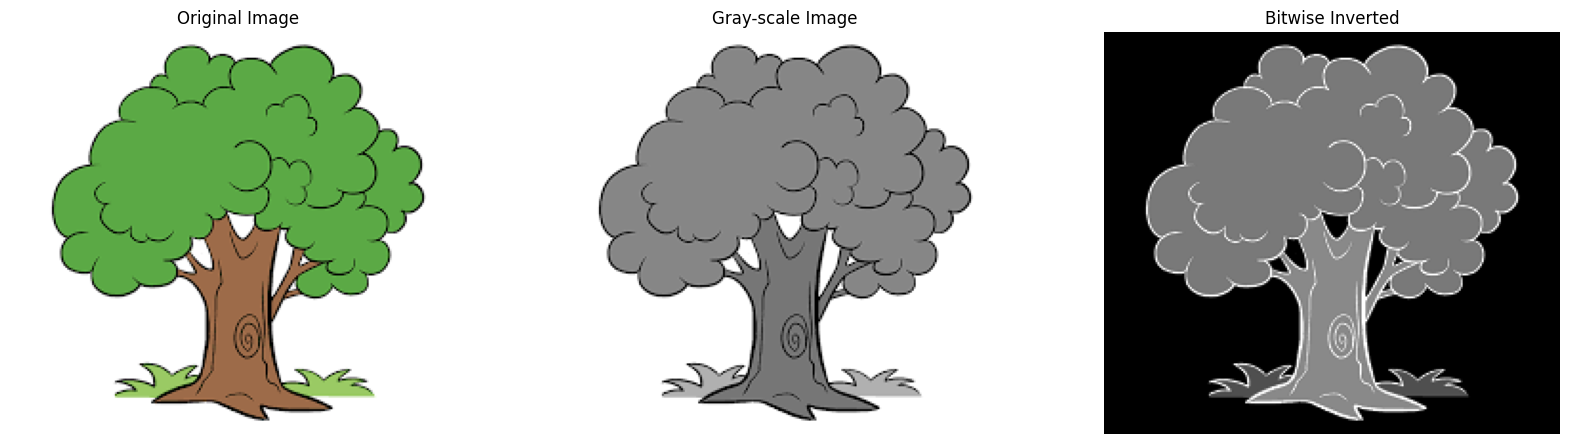

In [15]:

fig,ax = plt.subplots(1,3,figsize = (20,20))

# Original Image

ax[0].imshow(image[:,:,::-1])
ax[0].set_title("Original Image")
ax[0].axis("off")

# Gray-scale

c_img = image.copy()
gray = cv2.cvtColor(c_img, cv2.COLOR_BGR2GRAY)

ax[1].imshow(gray, cmap="gray")
ax[1].set_title("Gray-scale Image")
ax[1].axis("off")

# Inverted colours

gray_inverted = cv2.bitwise_not(gray)

ax[2].imshow(gray_inverted ,cmap="gray")
ax[2].set_title("Bitwise Inverted")
ax[2].axis("off")



(-0.5, 238.5, 210.5, -0.5)

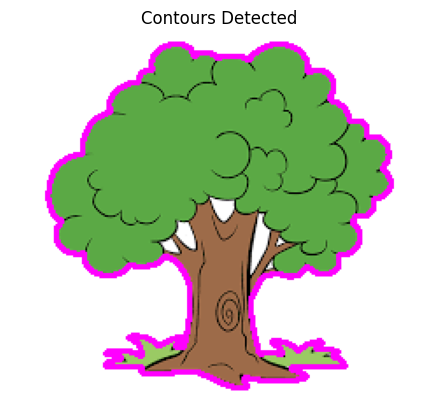

In [16]:
# Finding the contours from the inverted gray-scale image

contours, hierarchy = cv2.findContours(gray_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(c_img, contours, -1, (255, 0, 255), 2)

plt.imshow(c_img[:,:,::-1])
plt.title("Contours Detected")
plt.axis("off")


(-0.5, 238.5, 210.5, -0.5)

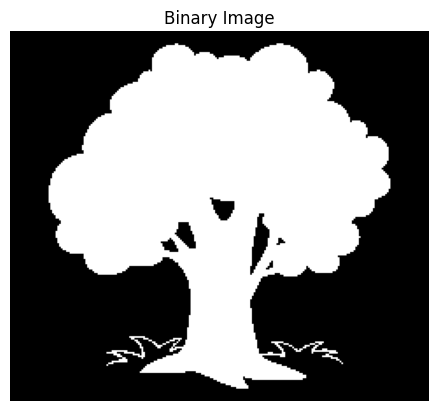

In [17]:
# Creating a binary thresholded image
_, binary = cv2.threshold(gray_inverted, 100, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap="gray")
plt.title("Binary Image")
plt.axis("off")


(-0.5, 238.5, 210.5, -0.5)

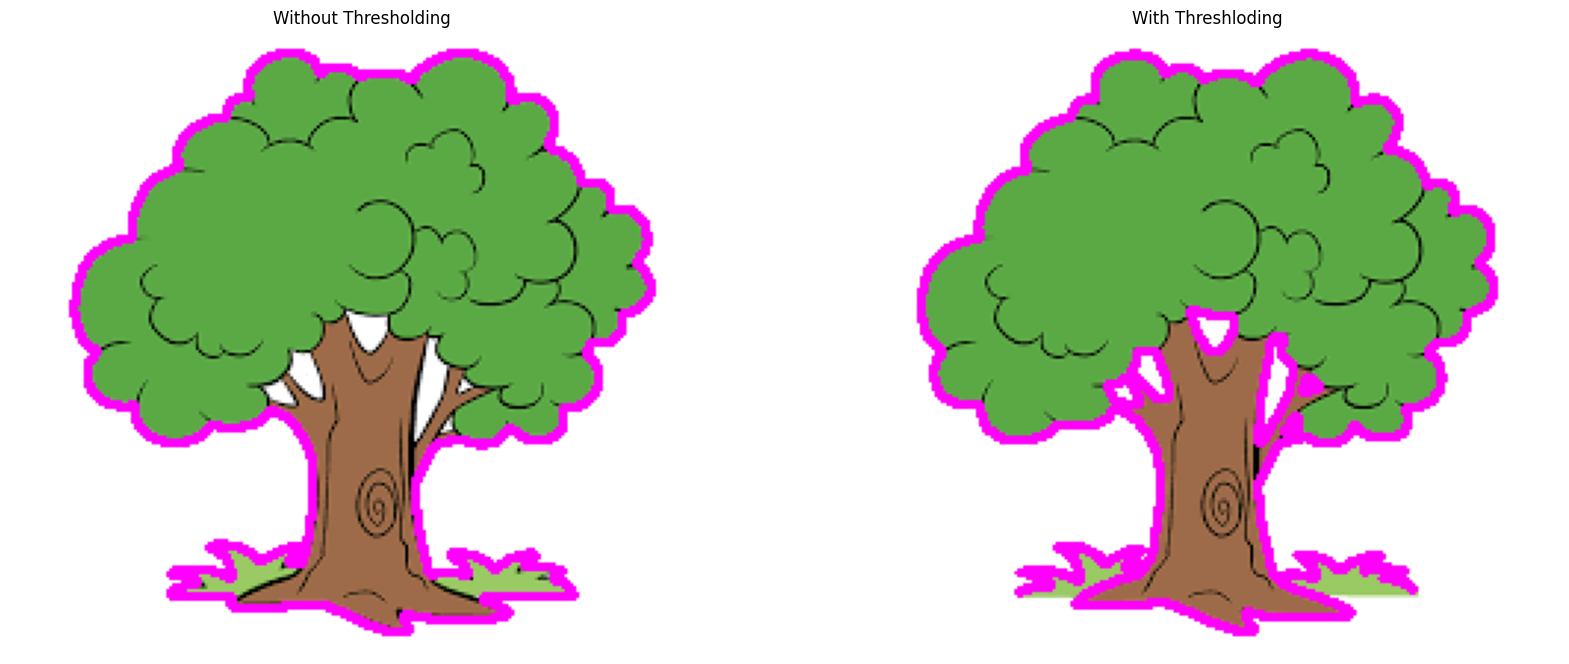

In [18]:
c2_img = image.copy()

# Finding & Drawing the contours from the binary thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

c2_img = cv2.drawContours(c2_img, contours, -1, (250, 0, 255), 2)

fig,ax = plt.subplots(1,2,figsize = (20,20))
ax[0].imshow(c_img[:,:,::-1])
ax[0].set_title("Without Thresholding")
ax[0].axis('off')

ax[1].imshow(c2_img[:,:,::-1])
ax[1].set_title("With Threshloding")
ax[1].axis('off')


### 2] Edge based method


In [19]:
img = cv2.imread('saved/mt.jpg') 


(-0.5, 2999.5, 4499.5, -0.5)

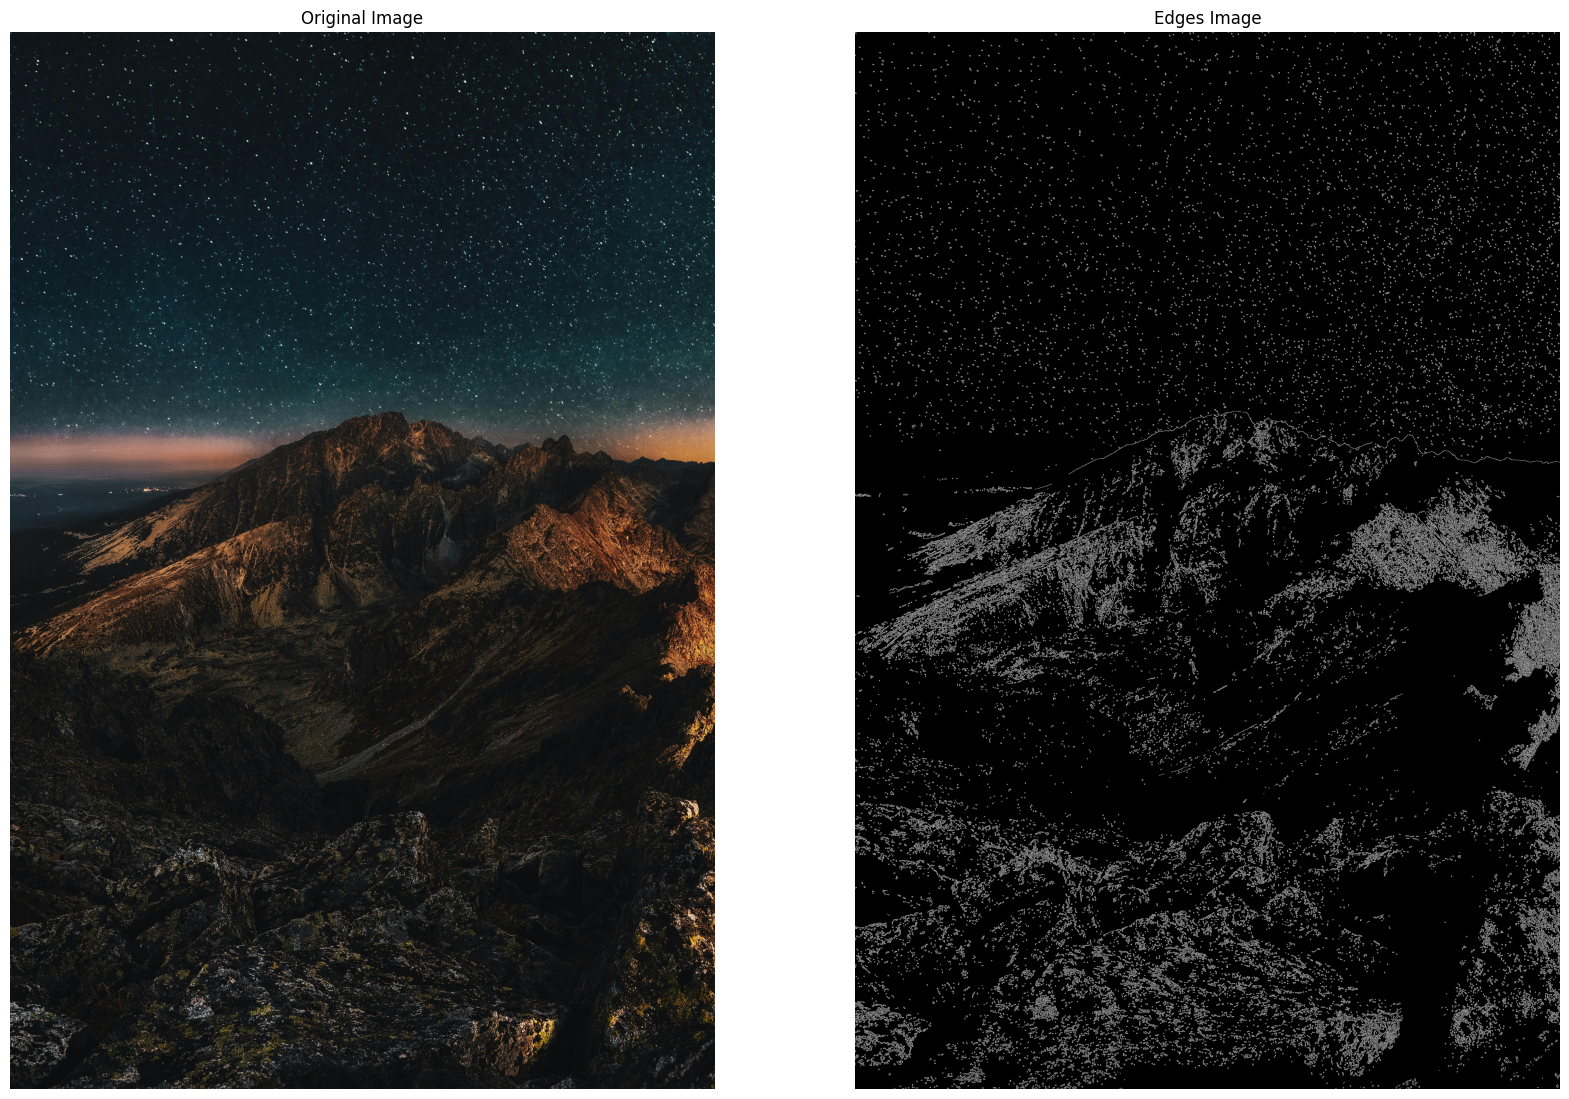

In [20]:
fig, ax = plt.subplots(1,2,figsize=(20,20))

# Original Image

ax[0].imshow(img[:,:,::-1])
ax[0].set_title("Original Image")
ax[0].axis("off")

# Apply canny edge detection

blurred_image = cv2.GaussianBlur(img.copy(),(5,5),0) # Blur the image to remove noise
edges = cv2.Canny(blurred_image, 100, 160)

ax[1].imshow(edges,cmap='Greys_r')
ax[1].set_title("Edges Image")
ax[1].axis("off")


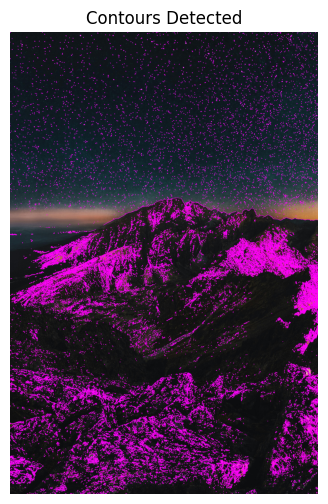

In [21]:
# Detect the contour using the using the edges
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours
image3_copy = img.copy()
cv2.drawContours(image3_copy, contours, -1, (255, 0, 255), 2)

# Display the drawn contours
plt.figure(figsize=[6,6])
plt.imshow(image3_copy[:,:,::-1]);plt.title("Contours Detected");plt.axis("off");

## Retrieval Mode :

- **1]** cv2.RETR_EXTERNAL - retrieves only the extreme outer contours.
- **2]** cv2.RETR_LIST - retrieves all of the contours without establishing any hierarchical relationships.
- **3]** cv2.RETR_TREE - retrieves all of the contours and reconstructs a full hierarchy of nested contours.
- **4]** cv2.RETR_CCOMP - retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.

RETR_EXTERNAL :
 Number of Contours Returned: 68
RETR_LIST :
 Number of Contours Returned: 561
RETR_TREE :
 Number of Contours Returned: 561
RETR_CCOMP :
 Number of Contours Returned: 561


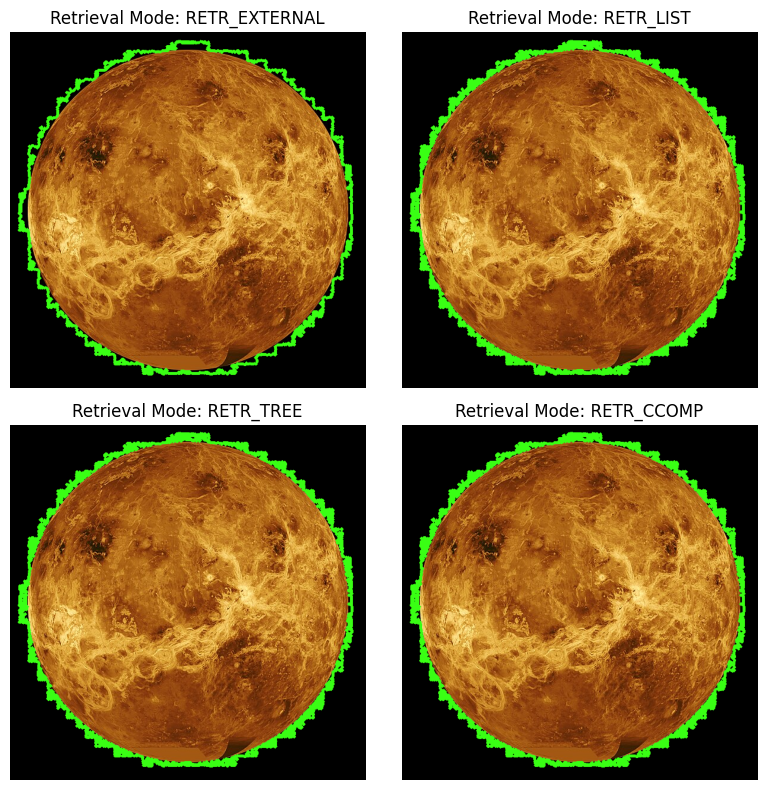

In [25]:
fig,ax = plt.subplots(2,2,figsize=(8,8))
name = 'mars'

# RETR_EXTERNAL

src = cv2.imread(f'saved/{name}.jpg')
imageGray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(src, contours, -1, (20,255,57), 3)
print("RETR_EXTERNAL :\n Number of Contours Returned: {}".format(len(contours)))

ax[0,0].imshow(src[:,:,::-1])
ax[0,0].axis("off")
ax[0,0].set_title('Retrieval Mode: RETR_EXTERNAL')


# RETR_LIST

src = cv2.imread(f'saved/{name}.jpg')
imageGray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(src, contours, -1, (20,255,57), 3)
print("RETR_LIST :\n Number of Contours Returned: {}".format(len(contours)))

ax[0,1].imshow(src[:,:,::-1])
ax[0,1].axis("off")
ax[0,1].set_title('Retrieval Mode: RETR_LIST')


# RETR_TREE

src = cv2.imread(f'saved/{name}.jpg')
imageGray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(src, contours, -1, (20,255,57), 3)
print("RETR_TREE :\n Number of Contours Returned: {}".format(len(contours)))

ax[1,0].imshow(src[:,:,::-1])
ax[1,0].axis("off")
ax[1,0].set_title('Retrieval Mode: RETR_TREE')


# RETR_CCOMP

src = cv2.imread(f'saved/{name}.jpg')
imageGray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(src, contours, -1, (20,255,57), 3)
print("RETR_CCOMP :\n Number of Contours Returned: {}".format(len(contours)))

ax[1,1].imshow(src[:,:,::-1])
ax[1,1].axis("off")
ax[1,1].set_title('Retrieval Mode: RETR_CCOMP')

plt.tight_layout()